## Author : Amogh Jagini
# THE SPARKS FOUNDATION 
## Task 2
## Prediction Using Unsupervised ML 

### Task Description: From the given 'iris' datset, predict the optimum number of clusters and represent it visually.

# Importing required libraries 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn import datasets

# Reading data

In [87]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Finding the Number of Clusters using Elbow Method 

In [88]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [89]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.477123363965468,
 13.91690875790876,
 11.051428739411813,
 9.281343349632822,
 7.615402244955954,
 6.55648629148629]

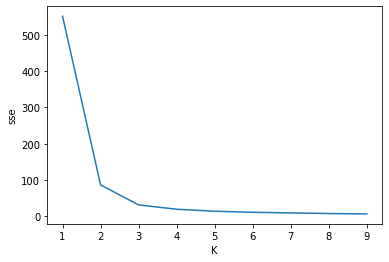

In [90]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

### we can observe that the number of optimum clusters is 3

# Shrinking the range between 0 and 1


In [91]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)','petal width (cm)']])
df[['petal length (cm)','petal width (cm)']] = scaler.transform(df[['petal length (cm)','petal width (cm)']])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


# KMeans Classifier

In [92]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [94]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

# Visualising the clusters and its centroid(s)

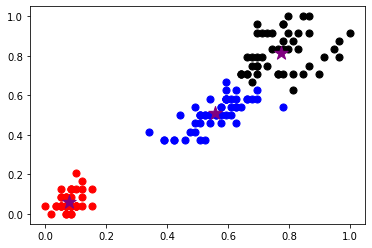

In [95]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],s=50,c='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],s=50,c='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],s=50,c='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c='purple',marker='*')